In [31]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
import scipy as sp
import seaborn as sns # statistical visualisation
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import math
from sklearn import preprocessing as pp

sns.set() # to have nore appealing visualisations

In [2]:
# Helper function: Prints out the data description and returns the head of the data
def data_describe(data):
    print(data.describe())
    return data.head()

In [3]:
# Takes file name at a given location
# Returns dataframe corresponding to data in file
def read_file(filepath='../data/alphaVantage/MSFT-full-daily_adjusted.csv'):
    column_names = [
                    'index', 'date', 'open', 
                    'high', 'low', 'close',
                    'adj_close', 'volume', 
                    'div_amt', 'split_coeff'
                   ]
    df = pd.read_csv(filepath, skiprows=1, header=None, names=column_names, index_col=['date'], parse_dates=['date'])
    df.drop(columns=['index'], inplace=True)
    return df

In [4]:
filepath = '../data/alphaVantage/MSFT-full-daily_adjusted.csv'
stocks = read_file(filepath)
print(stocks.info())
data_describe(stocks)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5235 entries, 2018-10-19 to 1998-01-02
Data columns (total 8 columns):
open           5235 non-null float64
high           5235 non-null float64
low            5235 non-null float64
close          5235 non-null float64
adj_close      5235 non-null float64
volume         5235 non-null int64
div_amt        5235 non-null float64
split_coeff    5235 non-null float64
dtypes: float64(7), int64(1)
memory usage: 368.1 KB
None
             open         high          low        close    adj_close  \
count  5235.00000  5235.000000  5235.000000  5235.000000  5235.000000   
mean     48.44273    49.038355    47.852888    48.457709    30.167208   
std      28.99268    29.440091    28.529358    29.017030    19.529484   
min      15.20000    15.620000    14.870000    15.150000    10.433200   
25%      27.04000    27.260000    26.850000    27.060000    18.905600   
50%      34.36000    34.670000    33.930000    34.350000    22.514200   
75%      63.00

,open,high,low,close,adj_close,volume,div_amt,split_coeff
date,,,,,,,,
2018-10-19,108.93,110.86,108.2100,108.66,108.66,32785475,0.0,1.0
2018-10-18,110.10,110.53,107.8300,108.50,108.50,32506192,0.0,1.0
2018-10-17,111.68,111.81,109.5482,110.71,110.71,26548243,0.0,1.0
2018-10-16,109.54,111.41,108.9500,111.00,111.00,31610164,0.0,1.0
2018-10-15,108.91,109.48,106.9468,107.60,107.60,32068103,0.0,1.0


In [5]:
# Plots the parameter specified for a given dataframe
def visualise_plot(df, param, title):
    df[param].plot(figsize=(20,10), fontsize=20)
    plt.xlabel('Year', fontsize=20)
    plt.title(title, fontsize=20)
    plt.show()

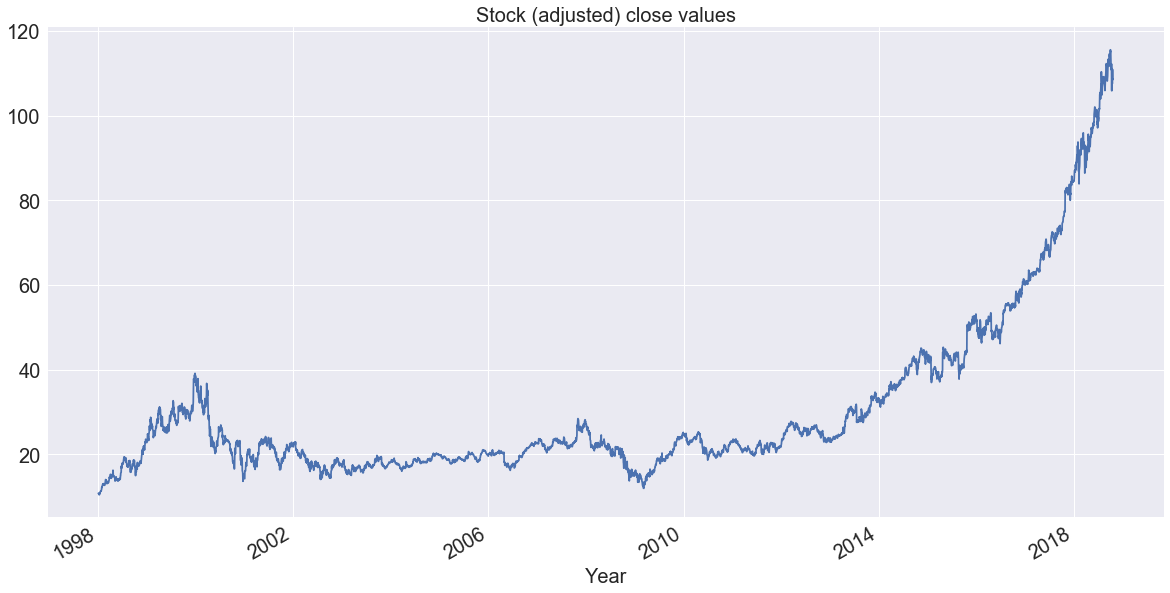

In [6]:
visualise_plot(stocks, 'adj_close', 'Stock (adjusted) close values')

## Converting to Returns

In [7]:
# Returns the daily returns of the stock based on a specified parameter within the data (Using Taylor series approximation)
def data_log_returns(data, param = "adj_close"):
    log_returns = list()
    date = list()
    for i in range(len(data) - 1):
        abs_t1 = math.log10(data.loc[data.index[i], param])
        abs_t0 = math.log10(data.loc[data.index[i + 1], param])
        log_returns.append(abs_t1 - abs_t0)
        date.append(data.index[i])
    return pd.DataFrame(log_returns, index=date, columns=['returns'])

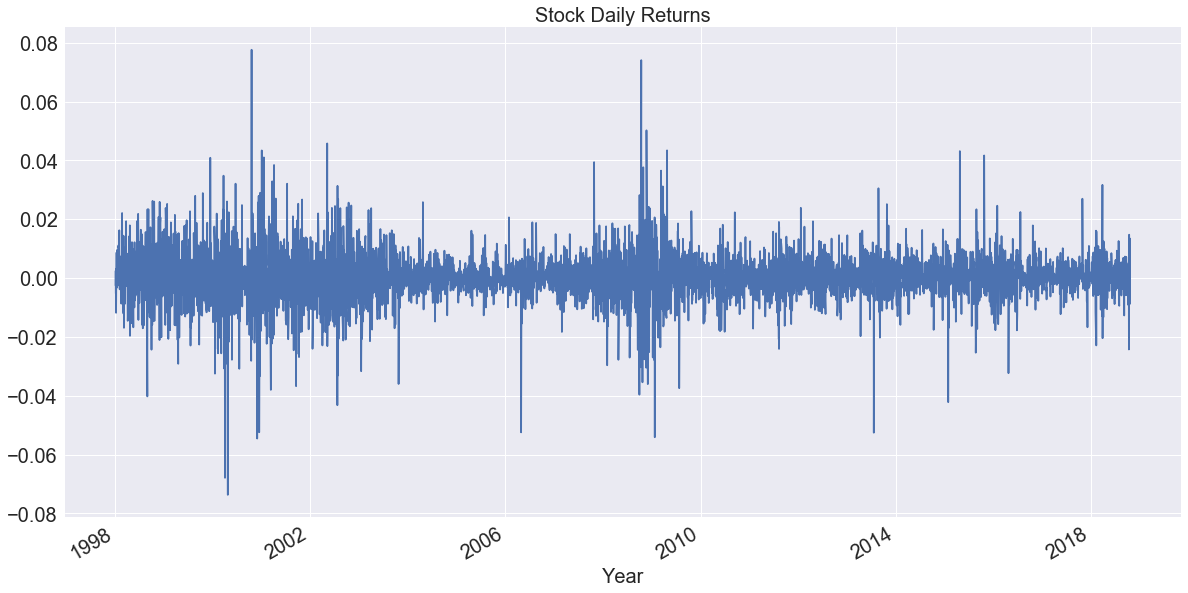

           returns
count  5234.000000
mean      0.000192
std       0.008551
min      -0.073692
25%      -0.003685
50%       0.000118
75%       0.004121
max       0.077641


,returns
2018-10-19,0.000640
2018-10-18,-0.008757
2018-10-17,-0.001136
2018-10-16,0.013511
2018-10-15,-0.007879


In [8]:
stock_returns = data_log_returns(stocks, "adj_close")
visualise_plot(stock_returns, 'returns', 'Stock Daily Returns')
data_describe(stock_returns)

## Scaling
### 1. Standard Scaling

In [9]:
# Standard Scaling the data to get 0 mean and 1 Standard Deviation
def standard_scaling_data(data):
    temp = data
    standardScaler = pp.StandardScaler()
    column_names = temp.columns
    standardScaler.fit(temp)
    data = pd.DataFrame(standardScaler.transform(temp), 
                        index=data.index, 
                        columns = column_names)
    return data

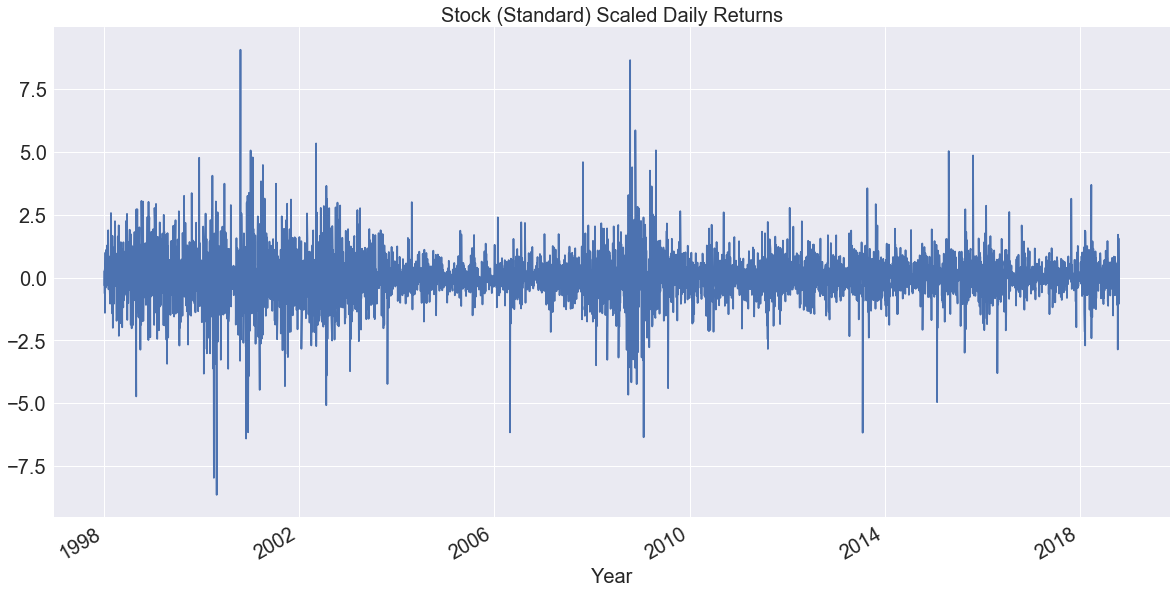

            returns
count  5.234000e+03
mean  -1.502853e-17
std    1.000096e+00
min   -8.641693e+00
25%   -4.534487e-01
50%   -8.682316e-03
75%    4.595532e-01
max    9.058660e+00


,returns
2018-10-19,0.052421
2018-10-18,-1.046690
2018-10-17,-0.155316
2018-10-16,1.557823
2018-10-15,-0.944028


In [10]:
std_scaled_stock_returns = standard_scaling_data(stock_returns)
visualise_plot(std_scaled_stock_returns, 'returns', 'Stock (Standard) Scaled Daily Returns')
data_describe(std_scaled_stock_returns)

### 2. Min-Max Scaling

In [11]:
# Standard Scaling the data to get 0 mean and 1 Standard Deviation
def min_max_scaling_data(data, min, max):
    temp = data
    minMaxScaler = pp.MinMaxScaler(feature_range=(min,max))
    column_names = temp.columns
    temp = minMaxScaler.fit_transform(temp)
    data = pd.DataFrame(temp, index=data.index, columns = column_names)
    return data

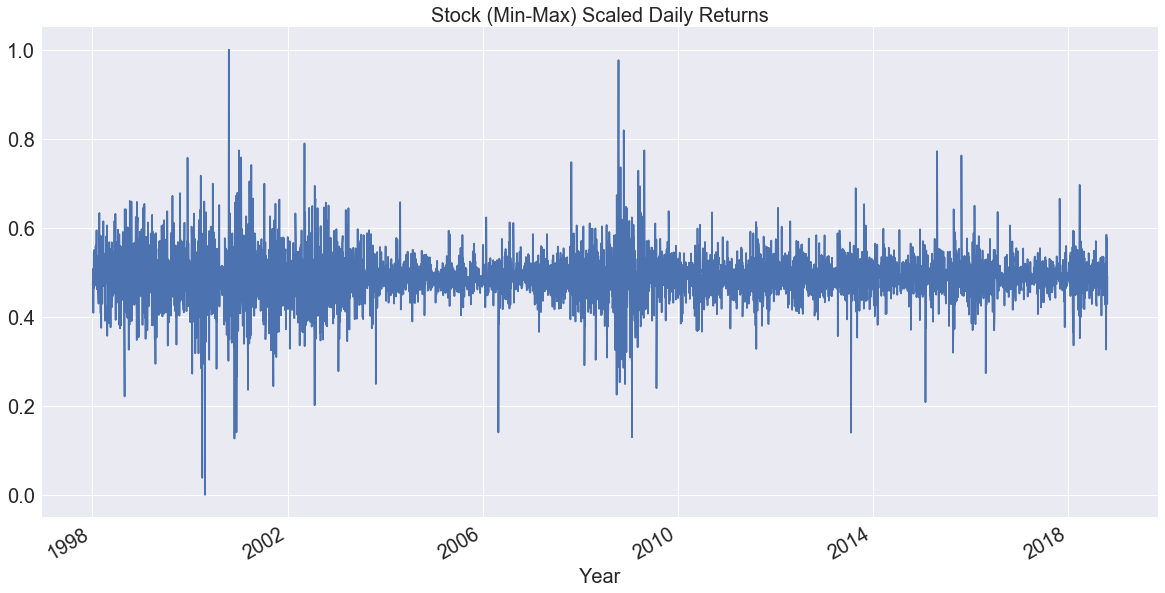

           returns
count  5234.000000
mean      0.488221
std       0.056501
min       0.000000
25%       0.462603
50%       0.487731
75%       0.514184
max       1.000000


,returns
2018-10-19,0.491183
2018-10-18,0.429088
2018-10-17,0.479447
2018-10-16,0.576232
2018-10-15,0.434888


In [12]:
minmax_scaled_stock_returns = min_max_scaling_data(stock_returns, 0, 1)
visualise_plot(minmax_scaled_stock_returns, 'returns', 'Stock (Min-Max) Scaled Daily Returns')
data_describe(minmax_scaled_stock_returns)

## Decomposition
### 1. Rolling Average Trend

In [13]:
# Plots the rolling average trend for a given dataframe and parameter
# Default window size of 252 days rolling around a year (Number of trading days in a year = 252)
def plot_rolling_average_trend(df, decomposition_param, window = 252):
    df[decomposition_param].rolling(window).mean().plot(figsize=(20,10), linewidth=2, fontsize=20) 
    # plotting the trend
    plt.title("Rolling Average Trend", fontsize=20)
    plt.xlabel('Year', fontsize=20);
    plt.show()

In [14]:
# This function plots the dataframe after trend removal using rolling mean
def plot_detrended_rolling_average(df, decomposition_param):
    daily_returns = df[decomposition_param]
    # Removing the trend (to see the seasonality and noise)
    daily_returns_detrend = daily_returns.diff()
    daily_returns_detrend.plot(figsize=(20,10), fontsize=20)
    plt.title('Data: Seasonality + Residue (Trend Rolling Mean)', fontsize=20)
    plt.xlabel('Year', fontsize=20);
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(20, 10))
    plt.scatter(daily_returns.index, daily_returns_detrend)
    plt.title('Data: Seasonality + Residue (Trend Rolling Mean)', fontsize=20)
    plt.xlabel('Year', fontsize=20);

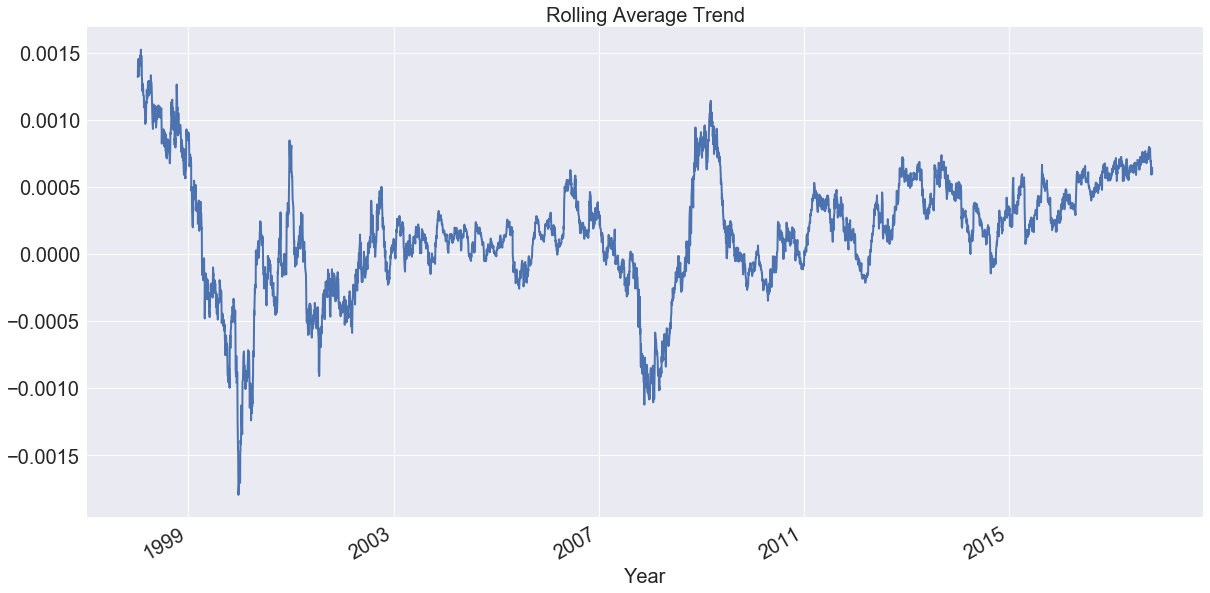

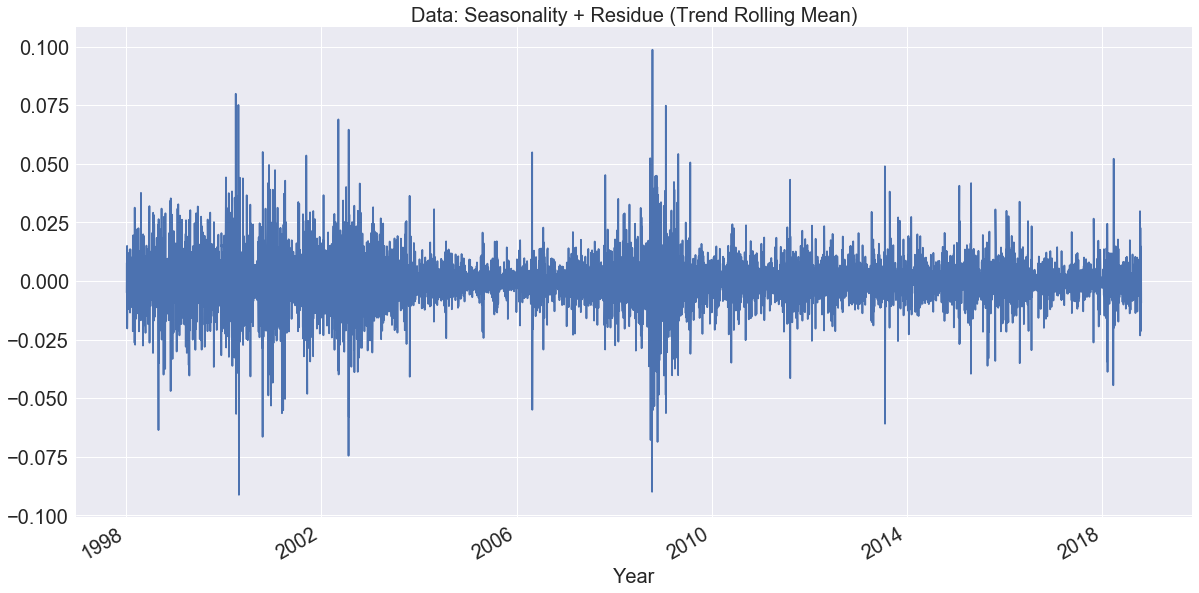

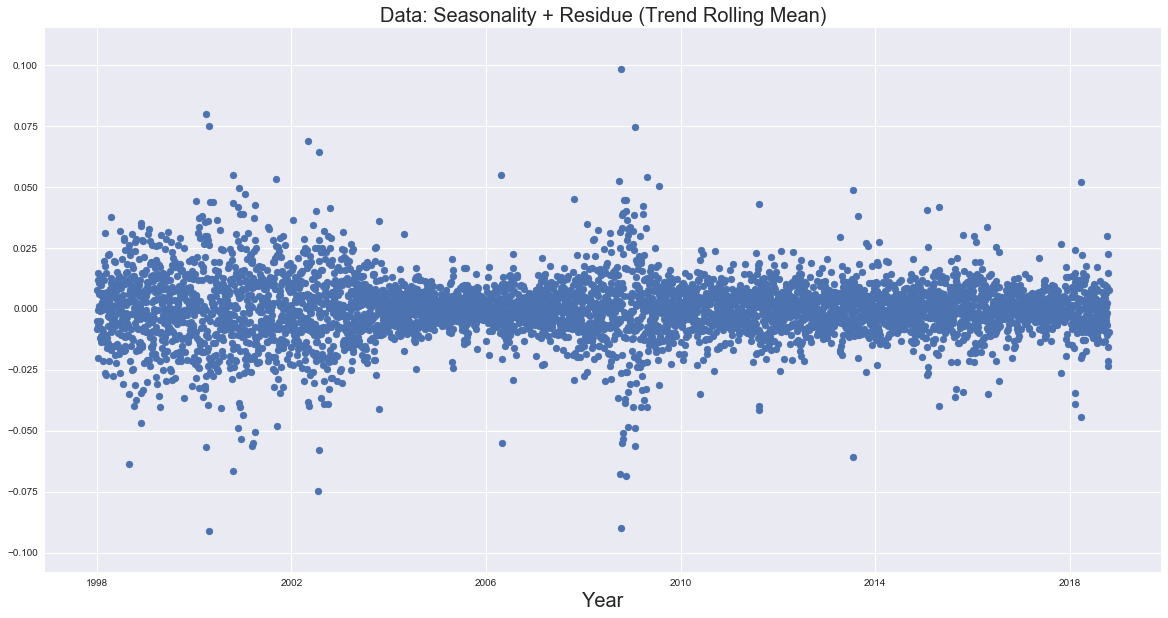

In [15]:
# df = stocks
# decomposition_param = 'adj_close'

df = stock_returns
# df = std_scaled_stock_returns
# df = minmax_scaled_stock_returns
decomposition_param = 'returns'

plot_rolling_average_trend(df, decomposition_param, 252)
plot_detrended_rolling_average(df, decomposition_param)

### 2. Using statsmodel sesasonal_deocmpose
Basics - https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

Frequency adjustment - https://stackoverflow.com/a/47610117

In [16]:
# Uses statsmodel sesasonal_deocmpose to plot the trend, seasonality and residue of the input dataframe
# Model: 'additive' or 'multiplicative'
def series_decomposition(df, param, model):
    result = seasonal_decompose(df[param], model=model, freq=252)
    result.plot()
    plt.xlabel('Year')
    plt.show()
    return result

Additive Decomposition:


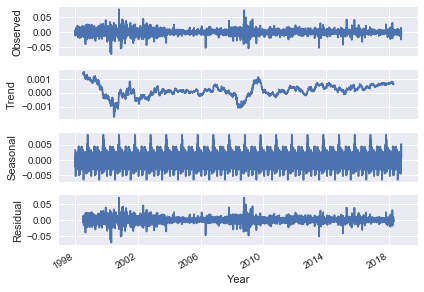

Additive: Seasonlity and Residue


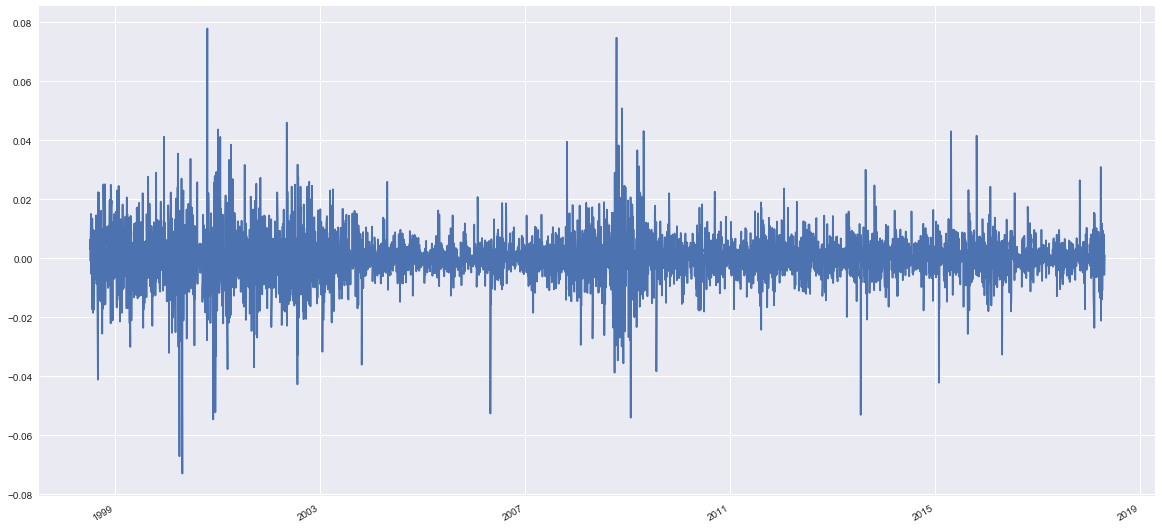

In [17]:
# df = stocks
# decomposition_param = 'adj_close'

df = stock_returns
# df = std_scaled_stock_returns
# df = minmax_scaled_stock_returns
decomposition_param = 'returns'

# df = min_max_scaling_data(stock_returns, 1, 2)



# Additive Decomposition using statsmodel seasonal decompose
print('Additive Decomposition:')    
add_decom = series_decomposition(df, decomposition_param, 'additive')
print('Additive: Seasonlity and Residue')
(add_decom.seasonal + add_decom.resid).plot(figsize=(20,10))
plt.show()

# Multiplicative Decomposition using statsmodel seasonal decompose
# print('Multiplicative Decomposition:')    
# mult_decom = series_decomposition(df, decomposition_param, 'multiplicative')
# print('Multiplicative: Seasonlity and Residue')
# (mult_decom.seasonal*mult_decom.resid).plot()
# plt.show()

## Data Properties

### 1. Autocorrelation
**Autocorrelation** is the correlation of a signal with a delayed copy of itself

In [18]:
# This function takes in a dataframe and the index of a column to plot the autocorrelation
def plot_autocorrelation(df, decomposition_param_index):
    # Printing autocorrelation for a particular lag value
    lag = 1
    print('Lag:', lag, '\t autocorrelation:', df.iloc[:, decomposition_param_index].diff().autocorr(lag=lag))
    
    plt.figure(figsize=(20,10))
    pd.plotting.autocorrelation_plot(df.iloc[:, decomposition_param_index])
    plt.title('Autocorrelation Plot', fontsize=20);

Lag: 1 	 autocorrelation: -0.5115544827407935


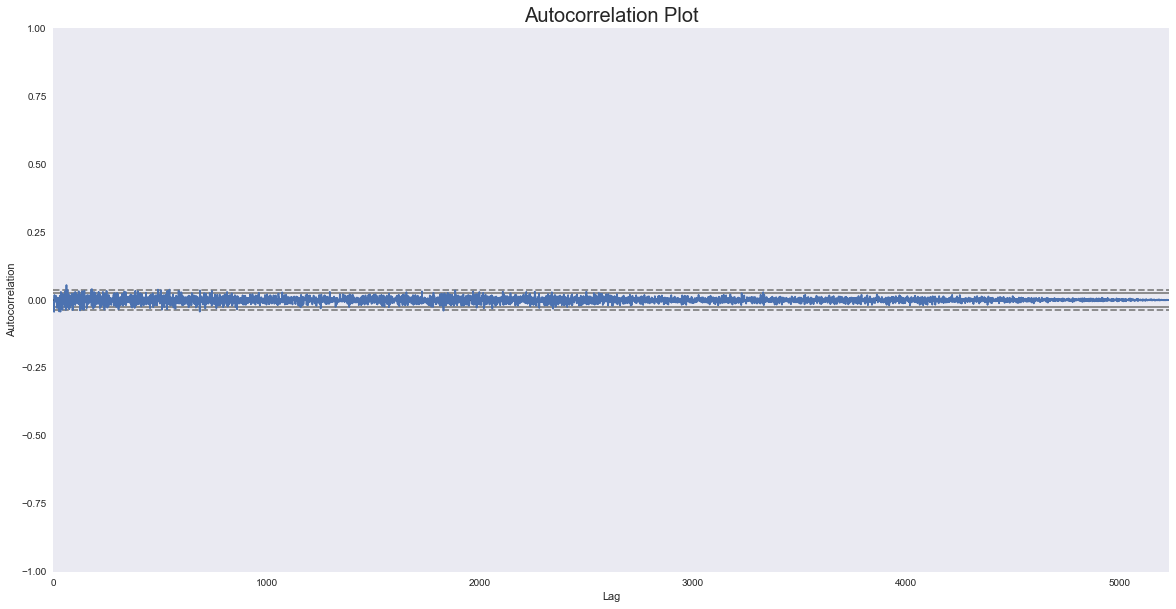

In [19]:
# df = stocks
# decomposition_param = 'adj_close'
# decomposition_param_index = 4

# df = stock_returns
# print(stock_returns.head())
df = std_scaled_stock_returns
# df = minmax_scaled_stock_returns
# decomposition_param = 'returns'
decomposition_param_index = 0

plot_autocorrelation(df, decomposition_param_index)

### 2. Distribution

In [20]:
# TODO plot the absolute values of returns on the log-log scale
# This function compares the data distribution to normal distribution
def plot_distribution(data, distribution='cdf'):
    # Plot the histogram.
    data.hist(bins=100, density=True, alpha=0.6, cumulative = True)

    # Get parameters of normal distribution i.e the mean and the variance:
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)

    if distribution == 'cdf':
        # Plot the CDF.
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, sp.stats.norm.cdf(x, mu, sigma))
    elif distribution == 'pdf':
        # Plot the PDF.
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, sp.stats.norm.pdf(x, mu, sigma))
        
    # plt.yscale("log")
    # plt.xscale("log")
    plt.title("Returns vs Normal Distribution")
    plt.show()

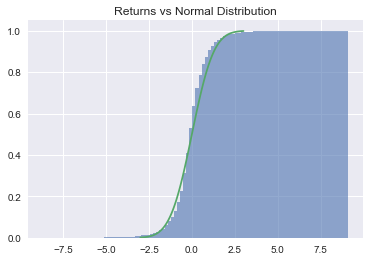

In [21]:
# Generate some data for plotting the data distribution
data = std_scaled_stock_returns
plot_distribution(data)

### 3. Kurtosis and Skew
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm  

**Skewness** is usually described as a measure of a dataset’s symmetry – or lack of symmetry.   A perfectly symmetrical data set will have a skewness of 0. The normal distribution has a skewness of 0.  
https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#skewness  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html  
  
**Kurtosis** is all about the tails of the distribution – not the peakedness or flatness.  It measures the tail-heaviness of the distribution. The normal distribution has a kurtosis of 0.  
(Kurtosis is the degree of peakedness of a distribution – Wolfram MathWorld)  
https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#kurtosis  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

In [22]:
# This function prints the skewness and kurtosis for the given data frame 
def skewness_kurtosis(df):
    print("Skewness: ", sp.stats.skew(df))
    print("Kurtosis: ", sp.stats.kurtosis(df))

In [23]:
skewness_kurtosis(std_scaled_stock_returns)

Skewness:  [-0.07832885]
Kurtosis:  [8.25029548]


### 4. Volatility
https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781787123137/15/ch15lvl1sec133/calculating-the-volatility-of-stocks

In [24]:
# This function takes in the dataframe, a parameter and the window frame
# The function calculates the volatility of the parameter specified within a
# given time window and plots the volatility of the parameter over the course of the data
def plot_volatility_curve(df, param, window = 252):
    vol = df[decomposition_param].rolling(window=window).std() * np.sqrt(window)
    vol.plot(figsize=(20, 10))

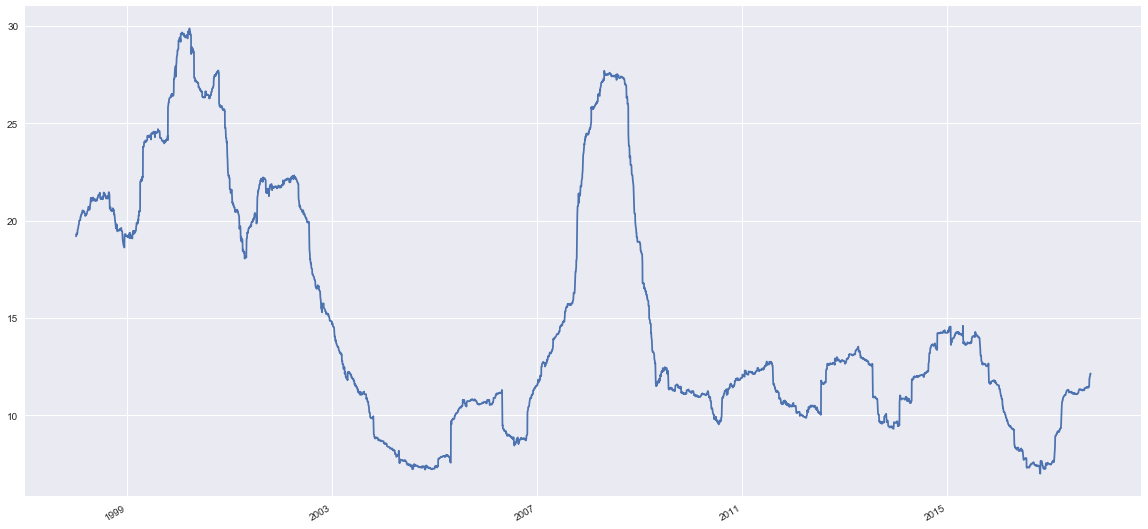

In [29]:
# df = stocks
# decomposition_param = 'adj_close'

# df = stock_returns
df = std_scaled_stock_returns
# df = minmax_scaled_stock_returns
decomposition_param = 'returns'

plot_volatility_curve(df, decomposition_param, window = 252)

### 5. P-Dickey Fuler Test
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [44]:
# This function implements the Rolling Mean and Augmented Dickey-Fuller test for stationarity
def test_stationarity(df, decomposition_param='returns', window = 252):
    # Determing rolling statistics 
    rolmean = df[decomposition_param].rolling(window).mean()
    rolstd = df[decomposition_param].rolling(window).std()
    
    plt.figure(figsize=(20,10))
    
    # Plot rolling statistics:
    orig = plt.plot(df[decomposition_param], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[decomposition_param], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

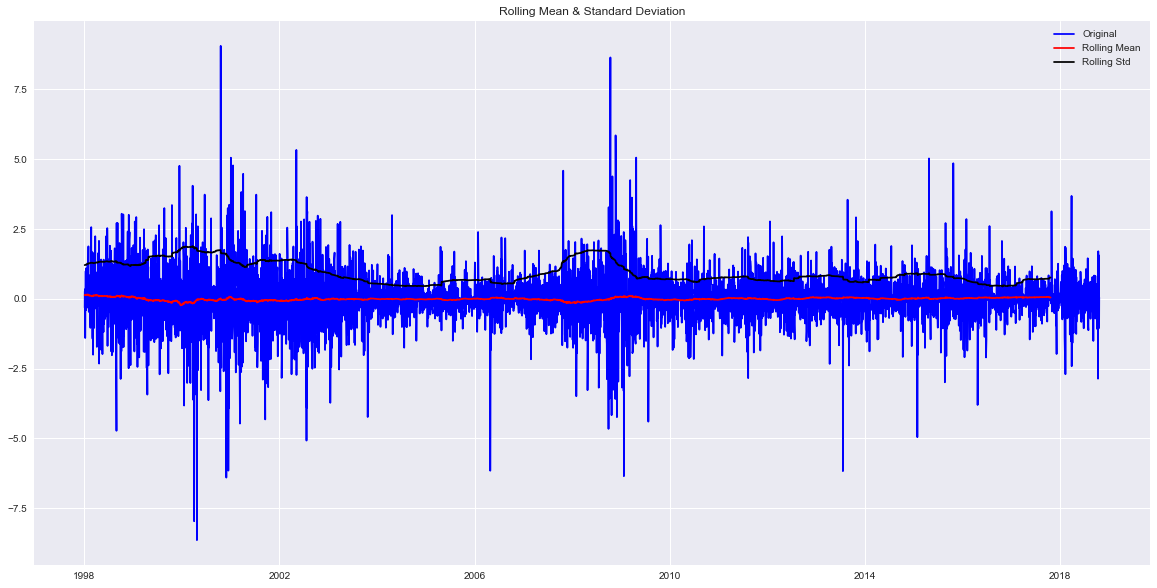

Results of Dickey-Fuller Test:
Test Statistic                  -38.784177
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5230.000000
Critical Value (1%)              -3.431601
Critical Value (5%)              -2.862093
Critical Value (10%)             -2.567064
dtype: float64


In [45]:
test_stationarity(std_scaled_stock_returns, 'returns')

1. plot the absolute values of returns on the log-log scale  
2. pdf and cdf
3. p-Dickey Fuller Test 
4. Implement algorithms